In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


im = cv.imread('D:\semester 5\EN3160\images\coins\coins.png', cv.IMREAD_GRAYSCALE)
assert im is not None, "file could not be read, check with os.path.exists()"
img2 = im.copy()

template = cv.imread('D:\semester 5\EN3160\images\coins\Penny.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"

w, h = template.shape[::-1]  # Returns the image width and height



In [4]:
# All the 6 methods for comparison in a list
methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR',
 'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']



# Template Matching Methods in OpenCV

## 1. TM_CCOEFF (Correlation Coefficient)
- **How It Works**: Computes the correlation coefficient between the template and the image. A high value indicates a strong match.
- **Values**: Ranges from -1 (perfectly negative correlation) to 1 (perfect positive correlation). Values close to 1 indicate a good match.
- **When to Use**: When you want to identify areas of the image that closely resemble the template. It's robust against changes in brightness and contrast.
- **Relevant Features**: Texture and structural similarity, but less sensitive to lighting conditions.

## 2. TM_CCOEFF_NORMED (Normalized Correlation Coefficient)
- **How It Works**: Similar to TM_CCOEFF, but normalizes the values to account for different brightness and contrast levels.
- **Values**: Ranges from 0 (no correlation) to 1 (perfect correlation).
- **When to Use**: Ideal for matching templates that might appear in different lighting conditions. It normalizes the match, making it more reliable.
- **Relevant Features**: Texture, pattern, and relative structural similarity are emphasized.

## 3. TM_CCORR (Cross-Correlation)
- **How It Works**: Measures the cross-correlation between the template and the image. Higher values indicate better matches.
- **Values**: Ranges from 0 to a maximum value, which indicates the degree of similarity.
- **When to Use**: When you want to find areas in the image that correlate directly with the template. It is sensitive to lighting changes.
- **Relevant Features**: Color and intensity; good for images where lighting is consistent.

## 4. TM_CCORR_NORMED (Normalized Cross-Correlation)
- **How It Works**: Normalizes the cross-correlation result to improve robustness against lighting variations.
- **Values**: Ranges from 0 (no correlation) to 1 (perfect correlation).
- **When to Use**: Useful in scenarios where you expect varying lighting conditions. It helps ensure that the matching is not skewed by brightness differences.
- **Relevant Features**: Color, intensity, and overall structural similarity.

## 5. TM_SQDIFF (Squared Difference)
- **How It Works**: Calculates the squared difference between the template and the image. A lower value indicates a better match.
- **Values**: Ranges from 0 (perfect match) to a maximum value, which indicates worse matches.
- **When to Use**: Suitable for images where you want to find exact pixel-wise matches. Good for templates that are not expected to vary significantly in appearance.
- **Relevant Features**: Color and intensity; very sensitive to changes in brightness.

## 6. TM_SQDIFF_NORMED (Normalized Squared Difference)
- **How It Works**: Similar to TM_SQDIFF, but normalizes the squared differences, making the result less sensitive to variations in brightness.
- **Values**: Ranges from 0 (perfect match) to 1 (worst match).
- **When to Use**: When you expect slight variations in appearance and want to ensure robustness against brightness changes.
- **Relevant Features**: Pixel intensity; emphasizes exact color matches but less sensitive to overall image lighting.

## Summary of When to Use Each Method

| Method                    | Best Use Case                                        | Sensitivity to Lighting        | Output Values              |
|---------------------------|-----------------------------------------------------|-------------------------------|----------------------------|
| TM_CCOEFF                 | Structural similarity, consistent lighting           | Robust against changes        | Range: -1 to 1             |
| TM_CCOEFF_NORMED         | Different lighting conditions                         | Very robust                   | Range: 0 to 1              |
| TM_CCORR                 | Direct correlation, consistent lighting              | Sensitive to changes          | Range: 0 to max            |
| TM_CCORR_NORMED          | Different lighting conditions                         | Very robust                   | Range: 0 to 1              |
| TM_SQDIFF                | Exact pixel matches, consistent conditions           | Sensitive to changes          | Range: 0 to max            |
| TM_SQDIFF_NORMED         | Slight variations, different lighting                | Less sensitive                | Range: 0 to 1              |


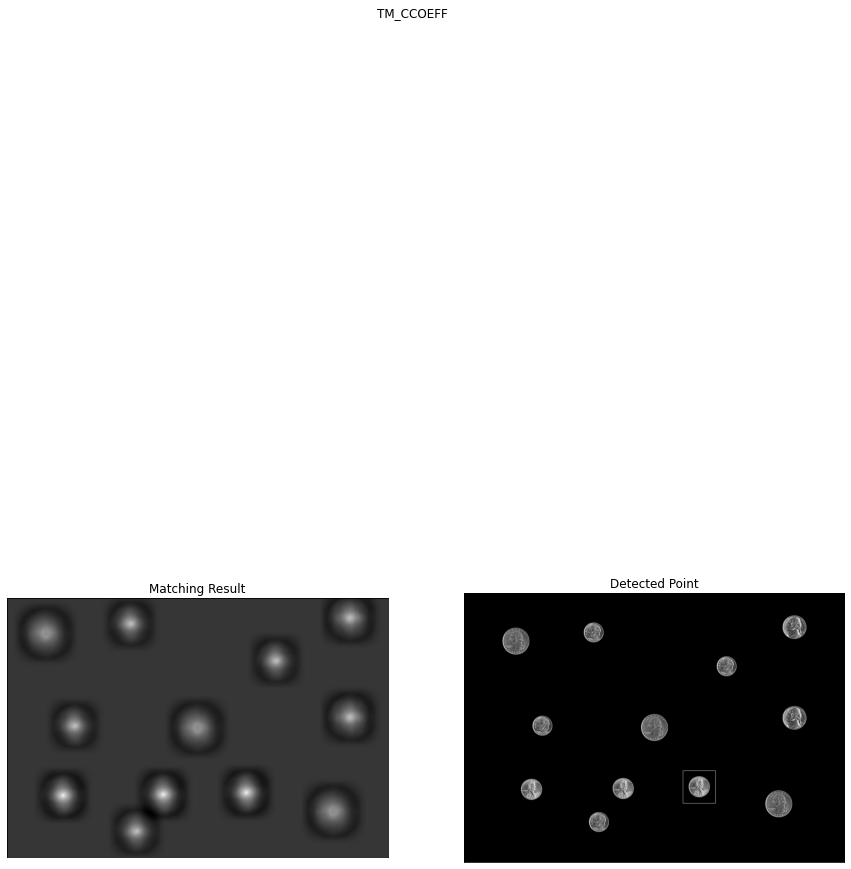

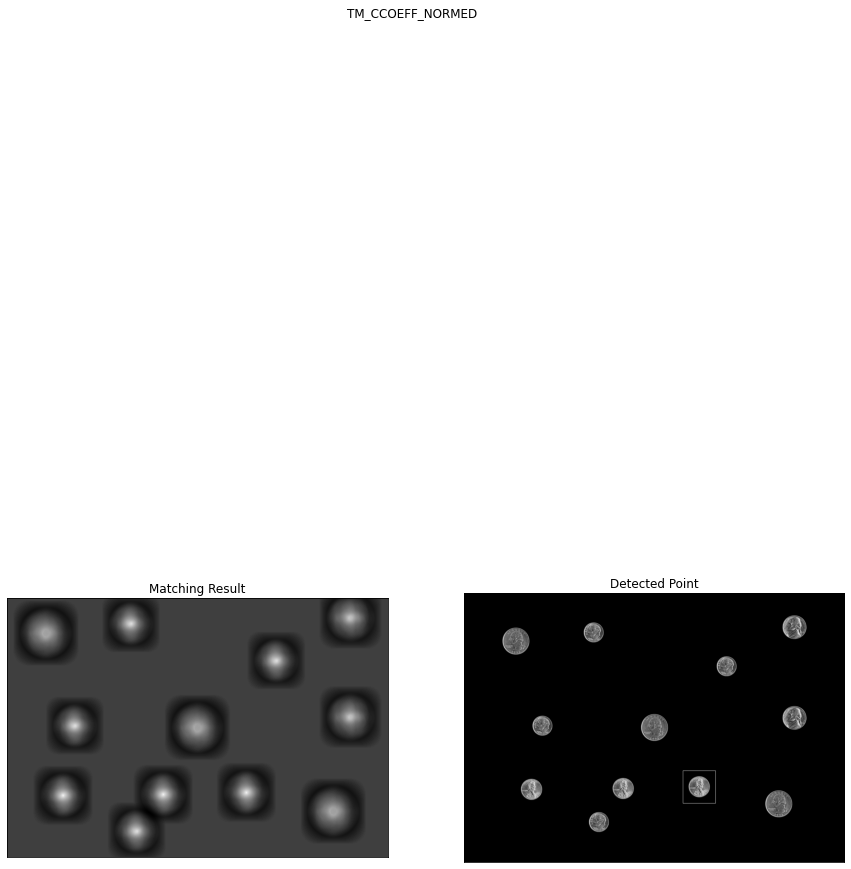

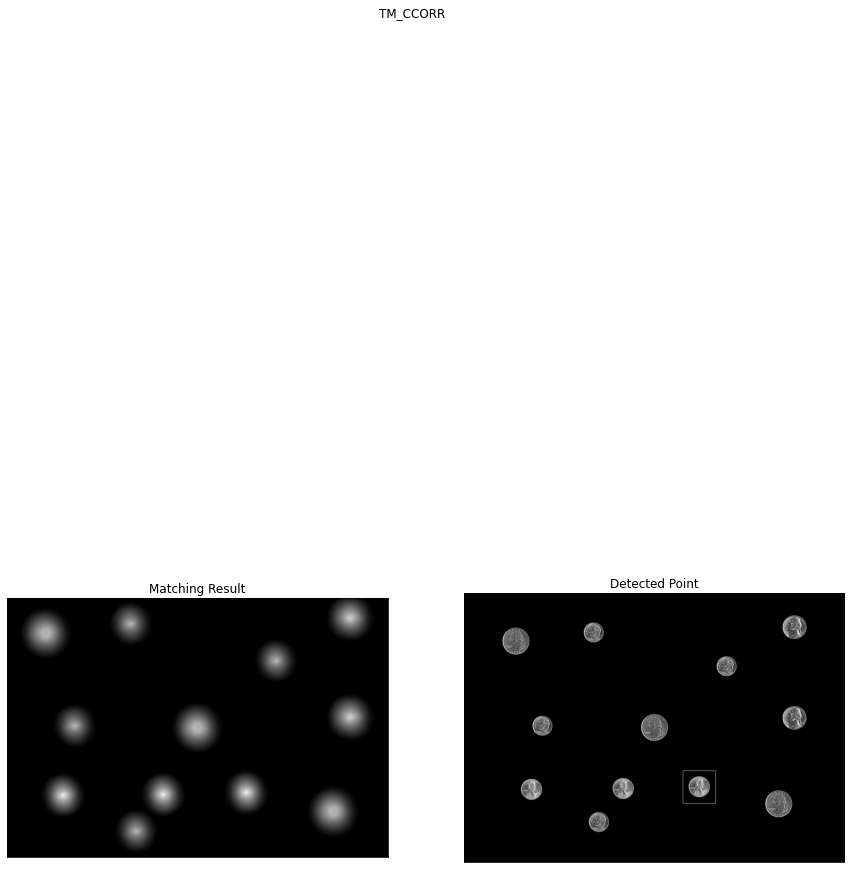

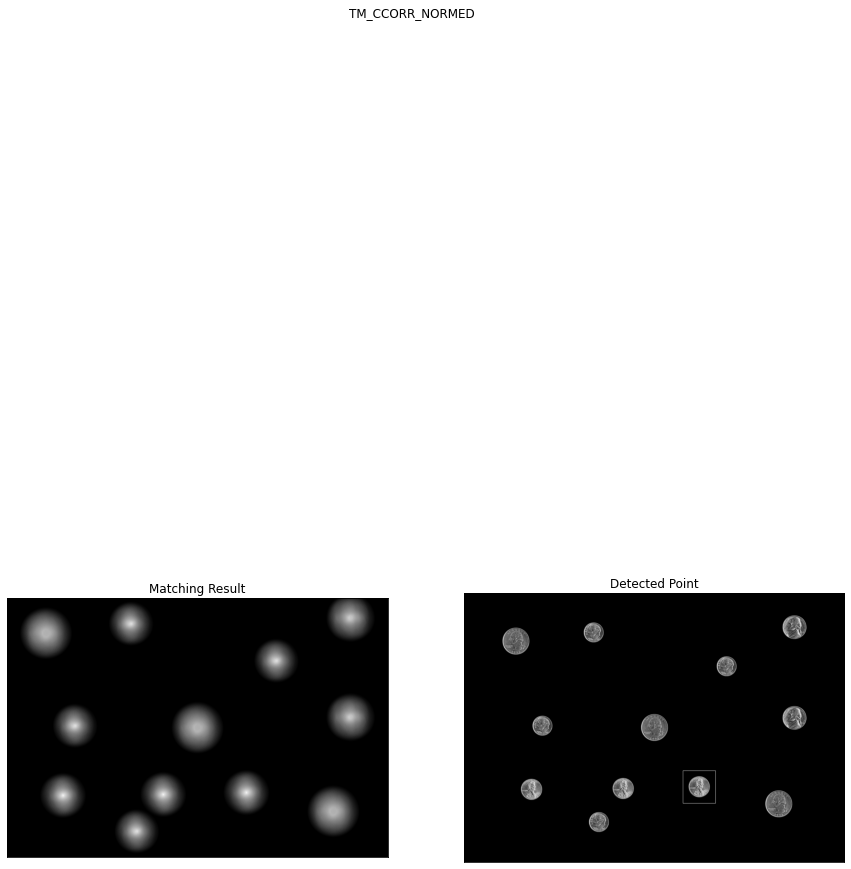

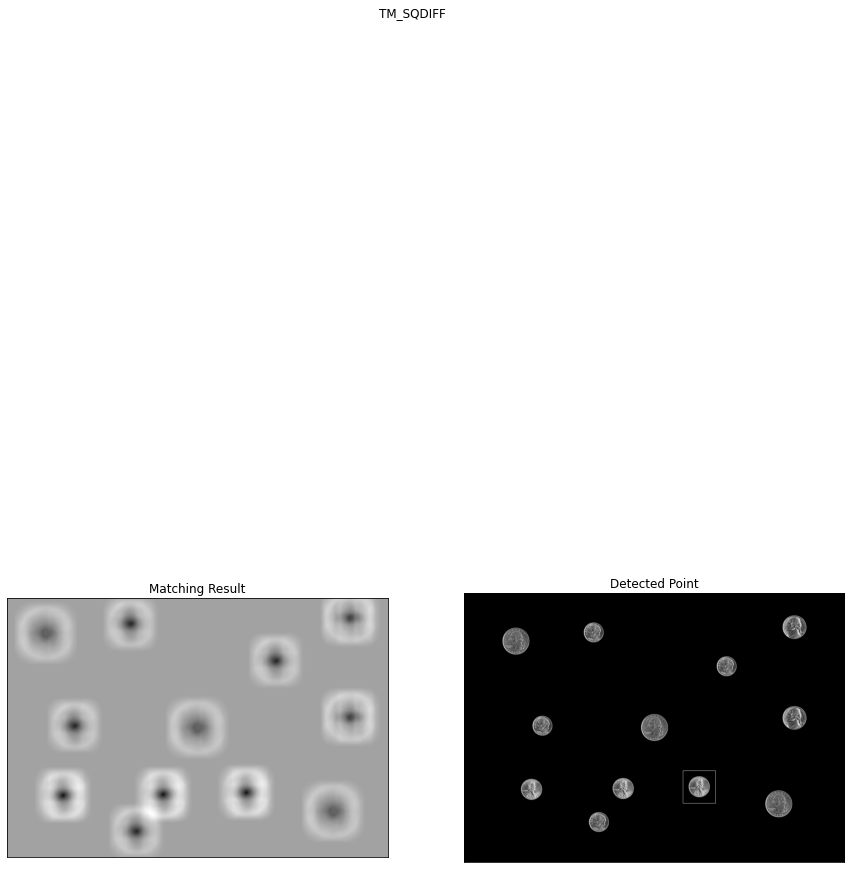

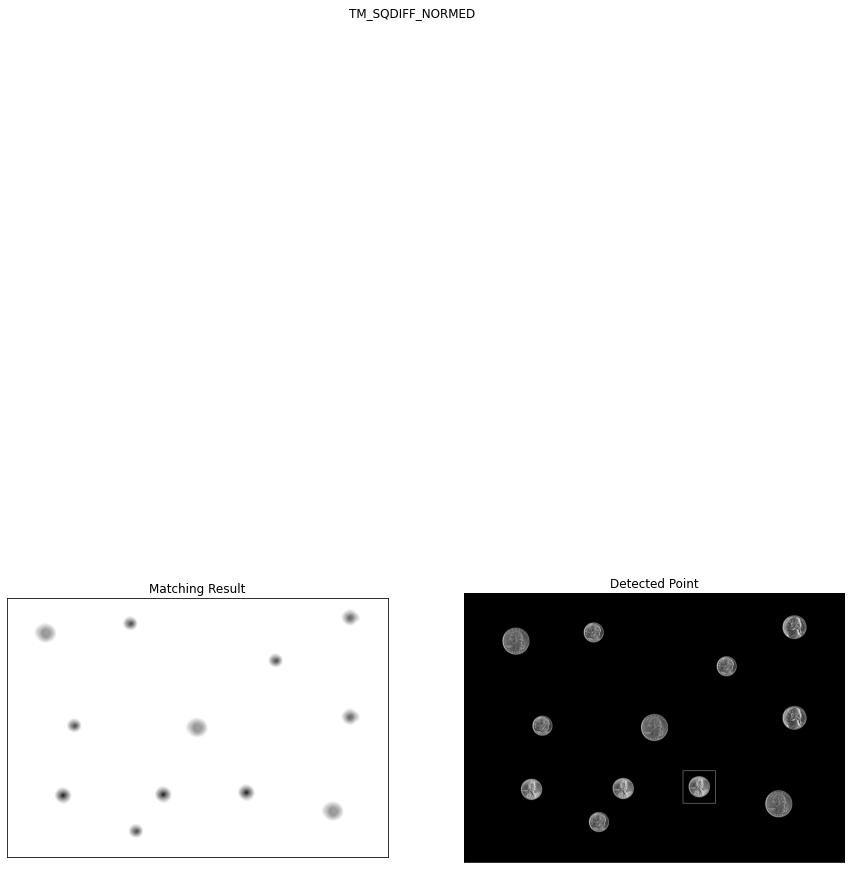

In [10]:
# This code is looking only for a single template in the image
# Not selecting all the templates in the image

for meth in methods:
    img = img2.copy()
    method = getattr(cv, meth)  # getattr(object, attribute_name), where attribute_name is a string
                                # getattr(cv, meth) dynamically retrieves the attribute named by the string meth from the cv module.
                                # If meth is "TM_CCOEFF", then getattr(cv, meth) is equivalent to cv.TM_CCOEFF

    
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)  #This function performs template matching between the source image im and the template image template using the specified method.
                                                 # contains the similarity scores indicating how well the template matches different regions of the coins image.

    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)  # This function finds the minimum and maximum values in the result image res and their respective locations.

    # min_val: This is the minimum value found in the result matrix res. In template matching, lower values indicate a better match for methods like cv.TM_SQDIFF.
    # max_val: This is the maximum value found in the result matrix res. Higher values indicate a better match for methods like cv.TM_CCOEFF and cv.TM_CCOEFF_NORMED
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # min_loc: This is the coordinate (x, y) of the location where min_val is found in the res matrix.
    # max_loc: This is the coordinate (x, y) of the location where max_val is found in the res matrix.
    # min_val and max_val provide information on how well the template matches the source image.
    
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]: # These methods return lower values for better matches. Hence, the best match corresponds to the minimum value (min_loc).
        top_left = min_loc
        # top_left - This variable stores the coordinates of the top-left corner of the best match location in the source image.

    else:
        top_left = max_loc  # These methods return higher values for better matches. Hence, the best match corresponds to the maximum value (max_loc)

    # bottom_right - This variable stores the coordinates of the bottom-right corner of the matching region, defining the rectangle that matches the template.   
    bottom_right = (top_left[0] + w, top_left[1] + h)  # top_left[0] - Represents the x-coordinate of the top-left corner of the matching region.
                                                       # top_left[1] - Represents the y-coordinate of the top-left corner of the matching region.
                                                       # The y-coordinate increases as you move down.
                                                       # The x-coordinate increases as you move to the right.
    
    # Draw a rectangular line around the matched region
    cv.rectangle(img,top_left, bottom_right, 255, 2) # 255- The color of the rectangle. Since the image is in grayscale, 255 corresponds to white. If the image were in color, this parameter would be a tuple representing the BGR
                                                     # 2 - thickness of the rectangular border in pixels
     
    plt.figure(figsize=(15,15))

    plt.subplot(121)  # 121 is a shorthand for (1, 2, 1), meaning 1 row, 2 columns, and this is the 1st subplot.
    plt.imshow(res,cmap = 'gray') # Displays the result of the template matching (res) in grayscale.
    plt.title('Matching Result')
    plt.xticks([]), plt.yticks([])  # Removes the x and y axis tick marks for a cleaner display

    plt.subplot(122)
    plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point')
    plt.xticks([]), plt.yticks([])

    plt.suptitle(meth)  # Sets a super title for the entire figure to the method name used in template matching (meth).
    
    # Adjust the layout to reduce the gap between the super title and the images
    plt.subplots_adjust(top=0.5)  # Adjust the value as needed

    plt.show()

In [1]:
# This template matching method will look for multiple obejects in the image


import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
im_rgb = cv.imread('D:\semester 5\EN3160\images\coins\coins.png')
assert im_rgb is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(im_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('D:\semester 5\EN3160\images\coins\Penny.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
 
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.85
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
 cv.rectangle(im_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
 
cv.imwrite('res.png',im_rgb)

True

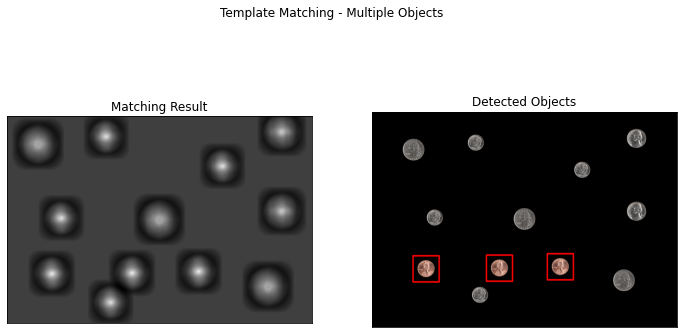

In [2]:
# This template matching method will look for multiple obejects in the image and plot it.


import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load the images
img_rgb = cv.imread('D:\semester 5\EN3160\images\coins\coins.png')
assert img_rgb is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('D:\semester 5\EN3160\images\coins\Penny.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]

# Perform template matching
res = cv.matchTemplate(img_gray, template, cv.TM_CCOEFF_NORMED)
threshold = 0.85
loc = np.where(res >= threshold)

# Draw rectangles around the detected objects
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

# Save the result image
cv.imwrite('res_1.png', img_rgb)

# Display the results using Matplotlib
plt.figure(figsize=(12, 6))

# First subplot: matching result
plt.subplot(121), plt.imshow(res, cmap='gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

# Second subplot: detected objects
plt.subplot(122), plt.imshow(cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB))
plt.title('Detected Objects'), plt.xticks([]), plt.yticks([])

# Set the super title and adjust layout
plt.suptitle('Template Matching - Multiple Objects')
plt.subplots_adjust(top=0.85)

# Show the plot
plt.show()


**How to get more accurate image selections**

1. Increase the Matching Threshold: A higher threshold can reduce false positives, but it might miss some valid detections. Start by slightly increasing the threshold value and observe the results.

2. Use Multiple Templates: Since different coins have different appearances, use multiple templates (one for each coin type) to perform template matching separately for each coin type. This reduces the chances of mismatches.

3. Refine Detection with Post-processing: Apply non-maximum suppression to filter out multiple overlapping detections of the same object.

**Explanation for the below code**

* Multiple Templates: Load templates for Penny, Nickel, Dime, and Quarter separately.

* Template Matching: Perform template matching for each coin type and draw rectangles around detected locations using a distinct color for each coin type.

* Threshold: Start with a threshold of 0.8 to reduce false positives. Adjust if necessary based on the detection results.

* Drawing Rectangles: Use a dedicated function to draw rectangles, which enhances code readability and modularity.

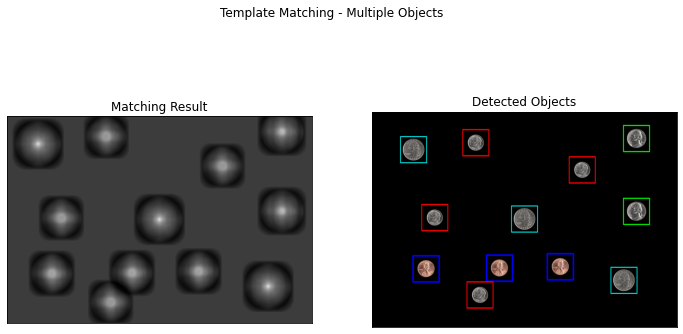

In [33]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load the main image
img_rgb = cv.imread('D:\semester 5\EN3160\images\coins\coins.png')
assert img_rgb is not None, "File could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

# Load the templates for different coins
templates = {
    'Penny': cv.imread('D:\semester 5\EN3160\images\coins\Penny.png', cv.IMREAD_GRAYSCALE),
    'Nickel': cv.imread('D:\\semester 5\\EN3160\\images\\coins\\Nickel.png', cv.IMREAD_GRAYSCALE),
    'Dime': cv.imread('D:\semester 5\EN3160\images\coins\Dime.png', cv.IMREAD_GRAYSCALE),
    'Quarter': cv.imread('D:\semester 5\EN3160\images\coins\Quarter.png', cv.IMREAD_GRAYSCALE)
}

# Verify templates are loaded
for name, template in templates.items():
    assert template is not None, f"{name} template could not be read, check with os.path.exists()"

# Function to draw rectangles around detected objects
def draw_rectangles(image, locations, template_shape, color):
    for pt in zip(*locations[::-1]):
        # Uses zip(*locations[::-1]) to get coordinates for rectangles. The [::-1] reverses the order so that (y, x) becomes (x, y).
        cv.rectangle(image, pt, (pt[0] + template_shape[1], pt[1] + template_shape[0]), color, 2)

# Perform template matching for each coin type
threshold = 0.85 # threshold = 0.8: Defines a threshold for detecting matches. Only matches with a confidence score of threshold value or higher will be considered valid.

# At 0.8: Multiple detections occur; both the confident and less confident matches are drawn, leading to overlapping rectangles with different thicknesses.
# At 0.82: The algorithm continues to filter out some less confident detections, but a few still exist.
# At 0.85: Only the most confident match remains, resulting in a single rectangle around the coin.


# A dictionary mapping each coin type to a color for rectangle drawing.
colors = {
    'Penny': (255, 0, 0),  # Blue
    'Nickel': (0, 255, 0),  # Green
    'Dime': (0, 0, 255),  # Red
    'Quarter': (255, 255, 0)  # Cyan 
}

for name, template in templates.items():
    w, h = template.shape[::-1]  # For each template, gets the width (w) and height (h) by accessing the shape of the template image and reversing the order.
    res = cv.matchTemplate(img_gray, template, cv.TM_CCOEFF_NORMED)  # cv.matchTemplate(...): Compares the grayscale image with the current template.
                                                                     # cv.TM_CCOEFF_NORMED: Specifies the method for comparison, normalizing the results for better accuracy.

    loc = np.where(res >= threshold)  # np.where(...): Gets the coordinates of all points in the result (res) where the score meets or exceeds the threshold.

    draw_rectangles(img_rgb, loc, template.shape, colors[name]) # Calls draw_rectangles(...) to draw rectangles around detected coins using the current template's coordinates and associated color.

# Save the result image
cv.imwrite('res_updated.png', img_rgb)

# Display the results using Matplotlib
plt.figure(figsize=(12, 6))

# First subplot: matching result (for one of the templates)
plt.subplot(121), plt.imshow(res, cmap='gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

# Second subplot: detected objects
plt.subplot(122), plt.imshow(cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB))
plt.title('Detected Objects'), plt.xticks([]), plt.yticks([])

# Set the super title and adjust layout
plt.suptitle('Template Matching - Multiple Objects')
plt.subplots_adjust(top=0.85)

# Show the plot
plt.show()
